In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
dt1 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220618.txt", sep = ',', dtype='object')
dt2 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220611.txt", sep = ',', dtype='object')
dt3 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220604.txt", sep = ',', dtype='object')
dt4 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt", sep = ',', dtype='object')
dt5 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt", sep = ',', dtype='object')
dt6 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt", sep = ',', dtype='object')
dt7 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt", sep = ',', dtype='object')
dt8 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220430.txt", sep = ',', dtype='object')
dt9 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220423.txt", sep = ',', dtype='object')
dt10 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220416.txt", sep = ',', dtype='object')
dt11 = pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220409.txt", sep = ',', dtype='object')

In [3]:
#combine data sets from 11 weeks in one data frame
mta_spring = pd.concat([dt1, dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11], axis=0)

In [4]:
mta_spring

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,00:00:00,REGULAR,0007723832,0002713989 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,04:00:00,REGULAR,0007723850,0002713997 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,08:00:00,REGULAR,0007723859,0002714026 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,12:00:00,REGULAR,0007723888,0002714088 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,16:00:00,REGULAR,0007723964,0002714124 ...
...,...,...,...,...,...,...,...,...,...,...,...
211297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2022,05:00:00,REGULAR,0000000000,0000000068 ...
211298,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2022,09:00:00,REGULAR,0000000000,0000000069 ...
211299,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2022,13:00:00,REGULAR,0000000000,0000000073 ...
211300,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2022,17:00:00,REGULAR,0000000000,0000000076 ...


In [5]:
mta_spring.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,00:00:00,REGULAR,0007723832,0002713989 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,04:00:00,REGULAR,0007723850,0002713997 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,08:00:00,REGULAR,0007723859,0002714026 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,12:00:00,REGULAR,0007723888,0002714088 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,16:00:00,REGULAR,0007723964,0002714124 ...


In [6]:
#check how many null values in the data frame
mta_spring.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [7]:
#check how many duplicates in the data frame
mta_spring.duplicated().sum()

0

In [8]:
#how many stations?
len(mta_spring["STATION"].unique())

379

In [9]:
#rename columns for easier coding
mta_spring.columns = ['ca',
                   'unit',
                  'scp',
                  'station',
                  'linename',
                  'division',
                  'date',
                  'time',
                  'desc',
                  'entries_cum',
                  'exits_cum']

In [10]:
mta_spring.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,00:00:00,REGULAR,0007723832,0002713989 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,04:00:00,REGULAR,0007723850,0002713997 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,08:00:00,REGULAR,0007723859,0002714026 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,12:00:00,REGULAR,0007723888,0002714088 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,16:00:00,REGULAR,0007723964,0002714124 ...


In [11]:
#convert entries and exits cumulative data to numeric
mta_spring['entries_cum'] = pd.to_numeric(mta_spring['entries_cum'])
mta_spring['exits_cum'] = pd.to_numeric(mta_spring['exits_cum'])

In [12]:
#create new columns showing the actual number of people entering and exiting from the cumulative data columns
#abs makes sure that there are no negative values
mta_spring['entry_diff'] = (mta_spring['entries_cum'].diff()).abs()
mta_spring['exits_diff'] = (mta_spring['exits_cum'].diff()).abs()

In [13]:
mta_spring.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,entry_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,00:00:00,REGULAR,7723832,2713989,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,04:00:00,REGULAR,7723850,2713997,18.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,08:00:00,REGULAR,7723859,2714026,9.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,12:00:00,REGULAR,7723888,2714088,29.0,62.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,16:00:00,REGULAR,7723964,2714124,76.0,36.0


In [14]:
#add up the total number of people entering and exiting a station in a new column
mta_spring['total_traffic'] = mta_spring['entry_diff'] + mta_spring['exits_diff']

In [15]:
mta_spring.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,entry_diff,exits_diff,total_traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,00:00:00,REGULAR,7723832,2713989,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,04:00:00,REGULAR,7723850,2713997,18.0,8.0,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,08:00:00,REGULAR,7723859,2714026,9.0,29.0,38.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,12:00:00,REGULAR,7723888,2714088,29.0,62.0,91.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2022,16:00:00,REGULAR,7723964,2714124,76.0,36.0,112.0


In [16]:
mta_spring['total_traffic'].mean()

3292369.936195929

In [17]:
#checking to make sure there aren't any negative values
(mta_spring['total_traffic'] < 0).any()

False

In [18]:
#convert data to a date time variable and create new column with the dat of the week
mta_spring['date'] = pd.to_datetime(mta_spring['date'])
mta_spring['weekday'] = mta_spring['date'].dt.day_name()

In [19]:
mta_spring.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,entry_diff,exits_diff,total_traffic,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,00:00:00,REGULAR,7723832,2713989,NaN,NaN,NaN,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,04:00:00,REGULAR,7723850,2713997,18.0,8.0,26.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,08:00:00,REGULAR,7723859,2714026,9.0,29.0,38.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,12:00:00,REGULAR,7723888,2714088,29.0,62.0,91.0,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,16:00:00,REGULAR,7723964,2714124,76.0,36.0,112.0,Saturday


In [39]:
mta_spring

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,entry_diff,exits_diff,total_traffic,weekday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,04:00:00,REGULAR,7723850,2713997,18.0,8.0,26.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,08:00:00,REGULAR,7723859,2714026,9.0,29.0,38.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,12:00:00,REGULAR,7723888,2714088,29.0,62.0,91.0,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,16:00:00,REGULAR,7723964,2714124,76.0,36.0,112.0,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-11,20:00:00,REGULAR,7724062,2714153,98.0,29.0,127.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-04-08,05:00:00,REGULAR,0,68,0.0,0.0,0.0,Friday
211298,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-04-08,09:00:00,REGULAR,0,69,0.0,1.0,1.0,Friday
211299,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-04-08,13:00:00,REGULAR,0,73,0.0,4.0,4.0,Friday
211300,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-04-08,17:00:00,REGULAR,0,76,0.0,3.0,3.0,Friday


In [20]:
#how many entries with over 14000 people in a four hour interval?
mta_spring['entry_diff'][mta_spring['entry_diff']>14000]

42         888182.0
84        5331608.0
126        278488.0
168       1597964.0
210       6105975.0
            ...    
211092    2906130.0
211134    3221690.0
211176    2387096.0
211218    2866306.0
211260     328911.0
Name: entry_diff, Length: 52651, dtype: float64

In [21]:
mta_spring['exits_diff'][mta_spring['exits_diff']>14000]

42        1117405.0
84        4185787.0
126       2914864.0
168       2587191.0
210       6887983.0
            ...    
211050      28254.0
211092      29550.0
211134      25148.0
211176     368069.0
211218     401288.0
Name: exits_diff, Length: 51287, dtype: float64

In [22]:
#identify turnstiles that reported more than 14000 people in a four hour time period as outliers
outlier = mta_spring.loc[:, 'total_traffic'] > 14000

In [23]:
#convert outliers to null values
mta_spring.loc[outlier, 'total_traffic'] = np.nan

In [24]:
#drop null values
mta_spring = mta_spring.dropna(axis = 0)

In [25]:
mta_spring.isnull().sum()

ca               0
unit             0
scp              0
station          0
linename         0
division         0
date             0
time             0
desc             0
entries_cum      0
exits_cum        0
entry_diff       0
exits_diff       0
total_traffic    0
weekday          0
dtype: int64

In [26]:
#new table sorted by the number of people passing through, only showing the station, day of the week, and time
best_station = mta_spring.groupby(['station', 'weekday', 'time'])['total_traffic'].sum().reset_index().sort_values('total_traffic' , ascending=False)

In [27]:
best_station.head(10)

,station,weekday,time,total_traffic
93250,TIMES SQ-42 ST,Saturday,00:00:00,511943.0
6173,34 ST-HERALD SQ,Thursday,20:00:00,414056.0
6350,34 ST-PENN STA,Tuesday,20:00:00,411073.0
6366,34 ST-PENN STA,Wednesday,20:00:00,408941.0
6335,34 ST-PENN STA,Thursday,20:00:00,407800.0
6203,34 ST-HERALD SQ,Wednesday,20:00:00,397278.0
6181,34 ST-HERALD SQ,Tuesday,20:00:00,395919.0
6129,34 ST-HERALD SQ,Friday,20:00:00,395592.0
6262,34 ST-PENN STA,Friday,20:00:00,351325.0
6135,34 ST-HERALD SQ,Monday,20:00:00,349026.0


In [28]:
#combining all the rows with the same station name
best_station_simple = (best_station.groupby(['station']).agg({'total_traffic': 'sum'})).sort_values('total_traffic', ascending = False)

In [29]:
best_station_simple.head(10)

,total_traffic
station,
34 ST-PENN STA,9858300.0
GRD CNTRL-42 ST,8359736.0
34 ST-HERALD SQ,7473559.0
TIMES SQ-42 ST,6935021.0
14 ST-UNION SQ,6482981.0
86 ST,6362420.0
42 ST-PORT AUTH,6282064.0
23 ST,6228385.0
FULTON ST,5729696.0


In [30]:
#combining all the rows with the same weekday
best_day = (best_station.groupby(['weekday']).agg({'total_traffic': 'sum'})).sort_values('total_traffic' , ascending=False)

In [31]:
best_day

,total_traffic
weekday,
Wednesday,64070894.0
Thursday,63439058.0
Tuesday,62419333.0
Friday,60120075.0
Monday,55344308.0
Saturday,41487120.0
Sunday,33351390.0


In [32]:
#combining all rows with same time
best_time = (best_station.groupby(['time']).agg({'total_traffic': 'sum'})).sort_values('total_traffic', ascending = False)

In [33]:
best_time.head(24)

,total_traffic
time,
20:00:00,61101267.0
12:00:00,47428310.0
16:00:00,47284653.0
17:00:00,35565280.0
21:00:00,32719020.0
09:00:00,26336553.0
13:00:00,25676842.0
08:00:00,25470169.0
00:00:00,23394905.0


In [34]:
best_station_simple10 = best_station_simple.iloc[:10,:]

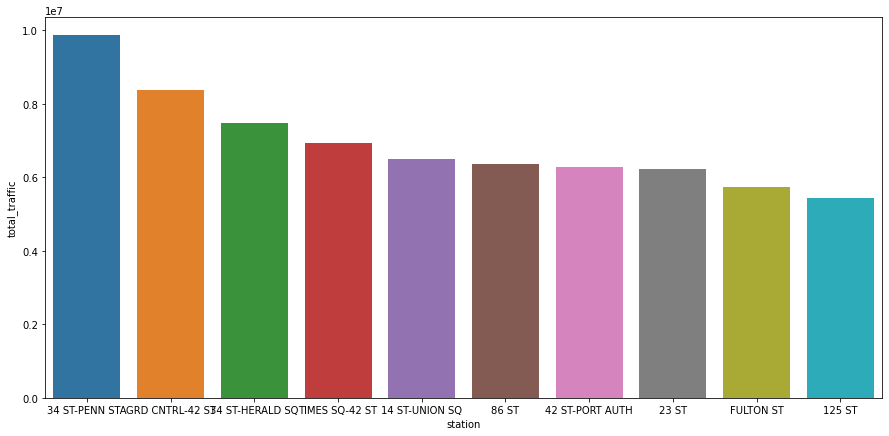

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(x=best_station_simple10.index,y=best_station_simple10["total_traffic"]);
plt.savefig('beststation.png', dpi=300, bbox_inches='tight')

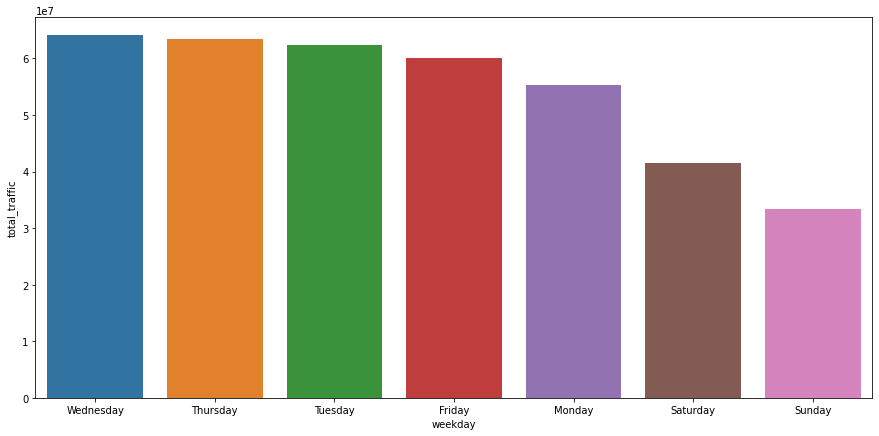

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x=best_day.index,y=best_day["total_traffic"]);
plt.savefig('bestday.png', dpi=300, bbox_inches='tight')

In [37]:
best_time10 = best_time.iloc[:12,:]

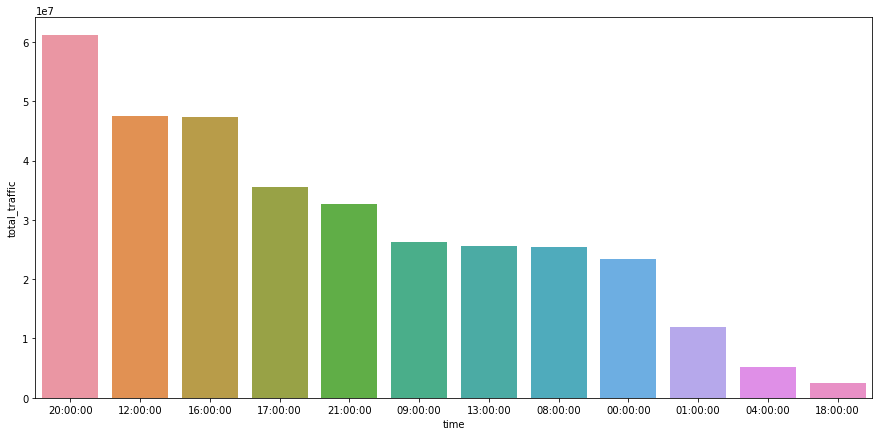

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(x=best_time10.index,y=best_time10["total_traffic"]);
plt.savefig('besttime.png', dpi=300, bbox_inches='tight')